In [57]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

#### Gretz:

In [3]:
# gretz Dataset

gretz = pd.read_csv("Data/gretz/arg_quality_rank_30k.csv", usecols=["argument", "topic", "set", "WA"])
gretz.rename(columns={"WA": "rank"}, inplace=True)

# save gretz for future reference
gretz.to_csv("Data/gretz/gretz_complete_set1.csv", sep=",", columns=["rank", "argument","topic"], index=False)

# split into the train-dev-test sets
train_gretz = gretz[gretz["set"] == "train"]
dev_gretz = gretz[gretz["set"] == "dev"]
test_gretz = gretz[gretz["set"] == "test"]

print(len(train_gretz))
print(len(dev_gretz))
print(len(test_gretz))

# prepare tab separated files that contain arg and WA scores

train_gretz.to_csv("Data/gretz/gretz_train1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
dev_gretz.to_csv("Data/gretz/gretz_dev1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
test_gretz.to_csv("Data/gretz/gretz_test1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)

# prepare gretz test set for toledo model but remove common topics
test_gretz_without_common_topics = test_gretz.loc[~test_gretz["topic"].isin(["Social media brings more harm than good"])]
test_gretz_without_common_topics.to_csv("Data/gretz/gretz_test_no_common_topics1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)

20974
3208
6315


#### Toledo Dataset

In [20]:
# toledo Dataset

filenames = glob.glob("Data/toledo/IBM-ArgQ-5.3kArgs/*.tsv")

complete_toledo = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename, sep="\t", engine='python')
    data["topic"] = filename[30:-4]
    complete_toledo.append(data)

comp_toledo = pd.concat(complete_toledo)
comp_toledo.reset_index(inplace=True, drop=True)

# save the complete set for future reference
comp_toledo.to_csv("Data/toledo/toledo_complete_set1.csv", sep=",", columns=["rank", "argument","topic"], index=False)

# prepare train, dev and test sets.

toledo_test_extra = comp_toledo.loc[comp_toledo["topic"].isin(["Flu-vaccination-should-be-mandatory-(PRO)", "Flu-vaccination-should-not-be-mandatory-(CON)"])].reset_index(drop=True)
toledo_training = comp_toledo.loc[~comp_toledo["topic"].isin(["Flu-vaccination-should-be-mandatory-(PRO)", "Flu-vaccination-should-not-be-mandatory-(CON)"])].reset_index(drop=True)

toledo_train, toledo_test = train_test_split(toledo_training, test_size= 0.05, random_state = 42, shuffle=True)
toledo_train, toledo_dev = train_test_split(toledo_train, test_size= 0.05, random_state = 42, shuffle=True)

toledo_test = pd.concat([toledo_test, toledo_test_extra])
print(len(toledo_train))
print(len(toledo_dev))
print(len(toledo_test))

toledo_train.to_csv("Data/toledo/toledo_train1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
toledo_dev.to_csv("Data/toledo/toledo_dev1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
toledo_test.to_csv("Data/toledo/toledo_test1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)


4571
241
486


#### Swanson Dataset

In [30]:
# swanson 

filenames = glob.glob("Data/swanson/*means.csv")

complete_swanson = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filenames[i], usecols=['GoodSliderMean', 'Phrase.x'], engine='python')
    data["topic"] = filename[13:-17]
    complete_swanson.append(data)

comp_swanson = pd.concat(complete_swanson)
comp_swanson.reset_index(inplace=True, drop=True)
comp_swanson.rename(columns={"GoodSliderMean": "rank", "Phrase.x": "argument"}, inplace=True)

# save comp_swanson for future reference
comp_swanson.to_csv("Data/swanson/swanson_complete_set1.csv", sep=",", columns=["rank", "argument", "topic"], index=False)

# swanson_test = comp_swanson.loc[comp_swanson["topic"] == "gc" ].reset_index(drop=True)
# swanson_training = comp_swanson[comp_swanson["topic"] != "gc"].reset_index(drop=True)

swanson_train, swanson_test = train_test_split(comp_swanson, test_size= 0.05, random_state = 42, shuffle=True)
swanson_train, swanson_dev = train_test_split(swanson_train, test_size= 0.05, random_state = 42, shuffle=True)
print(len(swanson_train))
print(len(swanson_dev))
print(len(swanson_test))

swanson_train.to_csv("Data/swanson/swanson_train1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
swanson_dev.to_csv("Data/swanson/swanson_dev1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
swanson_test.to_csv("Data/swanson/swanson_test1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)

4850
256
269


#### UKP Dataset

In [36]:
# ukprank

filenames = glob.glob("Data/habb/data/UKPConvArg1-Ranking-CSV/*.csv")
complete_ukprank = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename, sep="\t")
    data["topic"] = filename[39:-4]
    complete_ukprank.append(data)
    
comp_ukprank = pd.concat(complete_ukprank)
comp_ukprank.reset_index(inplace=True, drop=True)
comp_ukprank["rank_rev"] = 1 - comp_ukprank["rank"] 
comp_ukprank["rank_norm"] = (comp_ukprank["rank_rev"] - comp_ukprank["rank_rev"].min())/(comp_ukprank["rank_rev"].max() - comp_ukprank["rank_rev"].min())
comp_ukprank.rename(columns={"#id": "id", "rank": "old_rank", "rank_norm": "rank"}, inplace=True)

# save comp_ukprank for future reference
comp_ukprank.to_csv("Data/habb/ukprank_complete_set1.csv", sep=",", columns=["rank", "argument", "topic"], index=False)


# ukprank_test = comp_ukprank.loc[comp_ukprank["topic"].isin(["ban-plastic-water-bottles_no-bad-for-the-economy", "ban-plastic-water-bottles_yes-emergencies-only"])].reset_index(drop=True)
# ukprank_training = comp_ukprank.loc[~comp_ukprank["topic"].isin(["ban-plastic-water-bottles_no-bad-for-the-economy", "ban-plastic-water-bottles_yes-emergencies-only"])].reset_index(drop=True)

ukprank_training, ukprank_test = train_test_split(comp_ukprank, test_size= 0.05, random_state = 42, shuffle=True)
ukprank_train, ukprank_dev = train_test_split(ukprank_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(ukprank_train))
print(len(ukprank_dev))
print(len(ukprank_test))

ukprank_train.to_csv("Data/habb/ukprank_train1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
ukprank_dev.to_csv("Data/habb/ukprank_dev1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)
ukprank_test.to_csv("Data/habb/ukprank_test1.txt", sep="\t", columns=["argument", "rank", "topic"], index=False, header=False)


949
50
53


### Dataset Prep for Task 2:

In [3]:
loo_gretz_path = "loo_gretz"
loo_ibm_path = "loo_ibm"
loo_ukp_path = "loo_ukp"
loo_swanson_path = "loo_swanson"

In [4]:
gretz = pd.read_csv("gretz/gretz_complete_set.csv", sep=",")
toledo = pd.read_csv("toledo/toledo_complete_set.csv", sep=",")
swanson = pd.read_csv("swanson/swanson_complete_set.csv", sep=",")
ukprank = pd.read_csv("habb/ukprank_complete_set.csv", sep=",")

In [8]:
# leave gretz out
frames = [swanson_train, swanson_dev, toledo_train, toledo_dev, ukprank_train, ukprank_dev]
loo_gretz_training = pd.concat(frames,join='inner', ignore_index=True)

loo_gretz_train, loo_gretz_dev = train_test_split(loo_gretz_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_gretz_train))
print(len(loo_gretz_dev))

loo_gretz_train.to_csv("loo_gretz_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_gretz_dev.to_csv("loo_gretz_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

9350
493


In [9]:
# leave toledo out
frames = [swanson_train, swanson_dev, train_gretz, dev_gretz, ukprank_train, ukprank_dev]
loo_toledo_training = pd.concat(frames,join='inner', ignore_index=True)

loo_toledo_train, loo_toledo_dev = train_test_split(loo_toledo_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_toledo_train))
print(len(loo_toledo_dev))

loo_toledo_train.to_csv("loo_toledo_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_toledo_dev.to_csv("loo_toledo_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

27511
1448


In [10]:
# remove common topics from gretz datasets

gretz_train_no_common_topics = train_gretz.loc[~train_gretz["topic"].isin(['Social media brings more harm than good', 'We should stop the development of autonomous cars'])]
gretz_dev_no_common_topics = dev_gretz.loc[~dev_gretz["topic"].isin(['Social media brings more harm than good', 'We should stop the development of autonomous cars'])]

In [11]:
# leave swanson out
frames = [toledo_train, toledo_dev, gretz_train_no_common_topics, gretz_dev_no_common_topics, ukprank_train, ukprank_dev]
loo_swanson_training = pd.concat(frames,join='inner', ignore_index=True)

loo_swanson_train, loo_swanson_dev = train_test_split(loo_swanson_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_swanson_train))
print(len(loo_swanson_dev))

loo_swanson_train.to_csv("loo_swanson_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_swanson_dev.to_csv("loo_swanson_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

28304
1490


In [12]:
# leave ukprank out

frames = [toledo_train, toledo_dev, gretz_train_no_common_topics, gretz_dev_no_common_topics, swanson_train, swanson_dev]
loo_ukprank_training = pd.concat(frames,join='inner', ignore_index=True)

loo_ukprank_train, loo_ukprank_dev = train_test_split(loo_ukprank_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_ukprank_train))
print(len(loo_ukprank_dev))

loo_ukprank_train.to_csv("loo_ukprank_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_ukprank_dev.to_csv("loo_ukprank_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

30957
1630


### Task 3: All Dataset Training

In [13]:
frames = [toledo_train, toledo_dev, gretz_train_no_common_topics, gretz_dev_no_common_topics, swanson_train, swanson_dev, ukprank_train, ukprank_dev]

task3_training = pd.concat(frames,join='inner', ignore_index=True)

task3_train, task3_dev = train_test_split(task3_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(task3_train))
print(len(task3_dev))

task3_train.to_csv("task3_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
task3_dev.to_csv("task3_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)


31900
1679


### EDA:

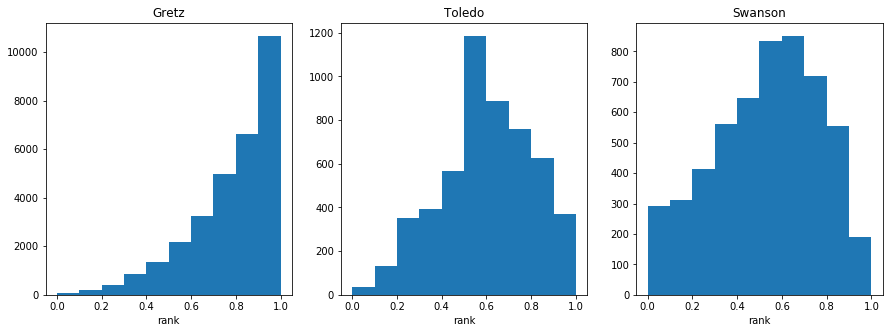

In [192]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].hist(gretz["rank"])
axes[0].set_title("Gretz")
axes[0].set_xlabel("rank")
axes[1].hist(comp_toledo["rank"])
axes[1].set_title("Toledo")
axes[1].set_xlabel("rank")
axes[2].hist(comp_swanson["rank"])
axes[2].set_title("Swanson")
axes[2].set_xlabel("rank")
plt.show()

In [195]:
comp_ukprank["rank_rev"] = 1 - comp_ukprank["rank"] 
comp_ukprank["rank_norm"] = (comp_ukprank["rank_rev"] - comp_ukprank["rank_rev"].min())/(comp_ukprank["rank_rev"].max() - comp_ukprank["rank_rev"].min())

In [197]:
# percentile linearization
size = len(comp_ukprank) - 1
helpful_percentile_linearization = comp_ukprank["rank"].rank(method='min').apply(lambda x: (x-1)/size)
print(helpful_percentile_linearization.describe())

count    1052.000000
mean        0.499726
std         0.289301
min         0.000000
25%         0.249286
50%         0.499049
75%         0.750000
max         1.000000
Name: rank, dtype: float64


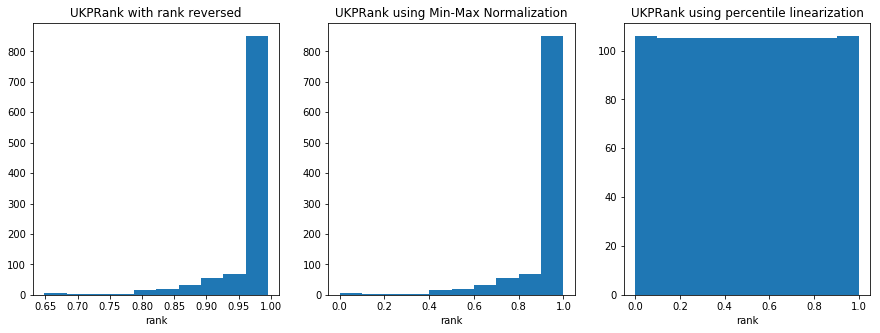

In [194]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].hist(comp_ukprank["rank_rev"])
axes[0].set_title("UKPRank with rank reversed")
axes[0].set_xlabel("rank")
axes[1].hist(comp_ukprank["rank_norm"])
axes[1].set_title("UKPRank using Min-Max Normalization")
axes[1].set_xlabel("rank")
axes[2].hist(helpful_percentile_linearization)
axes[2].set_title("UKPRank using percentile linearization")
axes[2].set_xlabel("rank")
plt.show()


In [ ]:
'''
- normalize UKPRank. 
- repeat the task related to ukp.

- multi task learning model: two datasets (Gretz + UKPRank AM dataset) : two different heads: regression and classification.
... batch learning ~ compare with the papers
'''

### Task 4:

In [37]:
# prepare the four datafiles with filenames as the dataset name and contains four columns: id, sentence, label, mode

gretz_train = pd.read_csv("Data/gretz/gretz_train1.txt", sep="\t", names=["argument", "label", "topic"])
gretz_dev = pd.read_csv("Data/gretz/gretz_dev1.txt", sep="\t", names=["argument", "label", "topic"])
gretz_test = pd.read_csv("Data/gretz/gretz_test_no_common_topics1.txt", sep="\t", names=["argument", "label", "topic"])

toledo_train = pd.read_csv("Data/toledo/toledo_train1.txt", sep="\t", names=["argument", "label", "topic"])
toledo_dev = pd.read_csv("Data/toledo/toledo_dev1.txt", sep="\t", names=["argument", "label", "topic"])
toledo_test = pd.read_csv("Data/toledo/toledo_test1.txt", sep="\t", names=["argument", "label", "topic"])

swanson_train = pd.read_csv("Data/swanson/swanson_train1.txt", sep="\t", names=["argument", "label", "topic"])
swanson_dev = pd.read_csv("Data/swanson/swanson_dev1.txt", sep="\t", names=["argument", "label", "topic"])
swanson_test = pd.read_csv("Data/swanson/swanson_test1.txt", sep="\t", names=["argument", "label", "topic"])

ukp_train = pd.read_csv("Data/habb/ukprank_train1.txt", sep="\t", names=["argument", "label", "topic"])
ukp_dev = pd.read_csv("Data/habb/ukprank_dev1.txt", sep="\t", names=["argument", "label", "topic"])
ukp_test = pd.read_csv("Data/habb/ukprank_test1.txt", sep="\t", names=["argument", "label", "topic"])

In [38]:
gretz_train["set"] = "train"
gretz_dev["set"] = "dev"
gretz_test["set"] = "test"

gretz = pd.concat([gretz_train, gretz_dev, gretz_test])
gretz.reset_index(inplace=True, drop=True)
gretz.to_csv("Data/gretz.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

toledo_train["set"] = "train"
toledo_dev["set"] = "dev"
toledo_test["set"] = "test"
toledo = pd.concat([toledo_train, toledo_dev, toledo_test])
toledo.reset_index(inplace=True, drop=True)

toledo.to_csv("Data/toledo.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

swanson_train["set"] = "train"
swanson_dev["set"] = "dev"
swanson_test["set"] = "test"
swanson = pd.concat([swanson_train, swanson_dev, swanson_test])
swanson.reset_index(inplace=True, drop=True)

swanson.to_csv("Data/swanson.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

ukp_train["set"] = "train"
ukp_dev["set"] = "dev"
ukp_test["set"] = "test"
ukp = pd.concat([ukp_train, ukp_dev, ukp_test])
ukp.reset_index(inplace=True, drop=True)

ukp.to_csv("Data/ukp.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

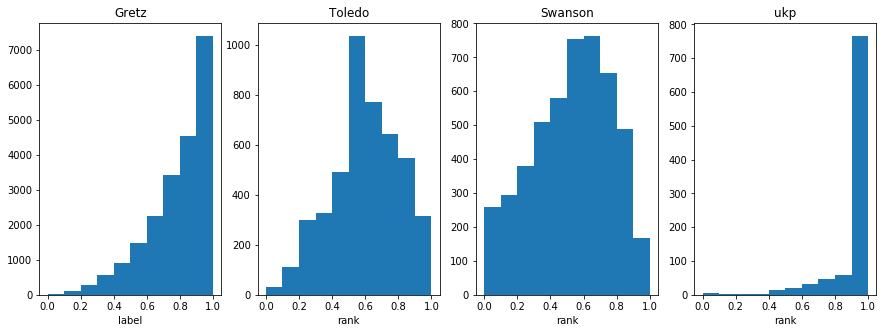

In [42]:
fig, axes = plt.subplots(1,4, figsize=(15, 5))

axes[0].hist(gretz_train["label"])
axes[0].set_title("Gretz")
axes[0].set_xlabel("label")
axes[1].hist(toledo_train["label"])
axes[1].set_title("Toledo")
axes[1].set_xlabel("rank")
axes[2].hist(swanson_train["label"])
axes[2].set_title("Swanson")
axes[2].set_xlabel("rank")
axes[3].hist(ukp_train["label"])
axes[3].set_title("ukp")
axes[3].set_xlabel("rank")
plt.show()

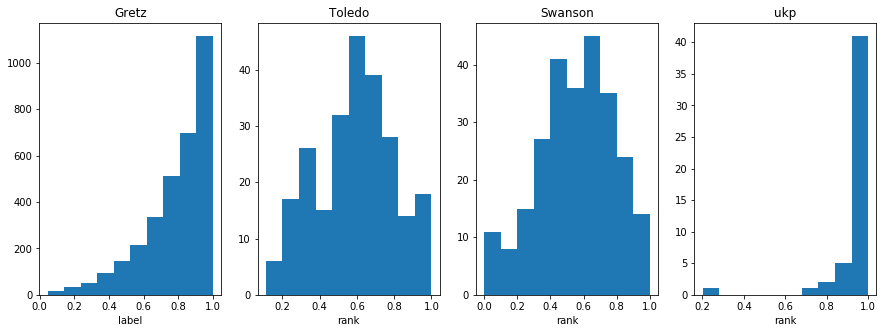

In [43]:
fig, axes = plt.subplots(1,4, figsize=(15, 5))

axes[0].hist(gretz_dev["label"])
axes[0].set_title("Gretz")
axes[0].set_xlabel("label")
axes[1].hist(toledo_dev["label"])
axes[1].set_title("Toledo")
axes[1].set_xlabel("rank")
axes[2].hist(swanson_dev["label"])
axes[2].set_title("Swanson")
axes[2].set_xlabel("rank")
axes[3].hist(ukp_dev["label"])
axes[3].set_title("ukp")
axes[3].set_xlabel("rank")
plt.show()

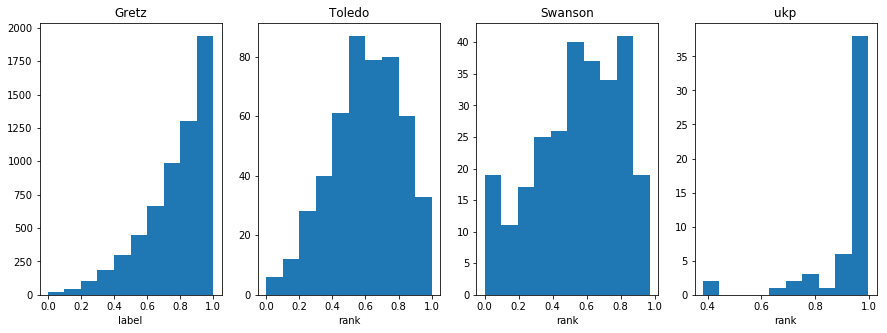

In [44]:
fig, axes = plt.subplots(1,4, figsize=(15, 5))

axes[0].hist(gretz_test["label"])
axes[0].set_title("Gretz")
axes[0].set_xlabel("label")
axes[1].hist(toledo_test["label"])
axes[1].set_title("Toledo")
axes[1].set_xlabel("rank")
axes[2].hist(swanson_test["label"])
axes[2].set_title("Swanson")
axes[2].set_xlabel("rank")
axes[3].hist(ukp_test["label"])
axes[3].set_title("ukp")
axes[3].set_xlabel("rank")
plt.show()

,argument,label,topic,set
0,6 million people died so to deny the holocaust...,0.738337,Holocaust denial should be a criminal offence,test
1,a ban would only bring problems in gender equa...,0.721728,We should prohibit women in combat,test
2,A centralized system of criminal defense would...,0.828674,The use of public defenders should be mandatory,test
3,a constantly growing population requires large...,0.732927,We should ban factory farming,test
4,a country would fall apart under libertarianis...,0.790850,We should adopt libertarianism,test
5,a criminal that offends two times is likely to...,0.717313,We should abolish the three-strikes laws,test
6,a criminal will think twice about committing a...,1.000000,We should abolish the three-strikes laws,test
7,a defendant has a right to defend himself,0.683184,The use of public defenders should be mandatory,test
8,a formal school prayer can not properly be con...,0.748915,We should prohibit school prayer,test
9,a government should do whatever it needs to to...,0.710451,We should ban targeted killing,test


In [48]:
len(gretz), len(ukp), len(swanson), len(toledo)

(30166, 1052, 5375, 5298)

In [76]:
datasets = [toledo, swanson, ukp, gretz]
toledo.name = "toeldo"
swanson.name = "swanson"
ukp.name = "ukp"
gretz.name = "gretz"
for dataset in datasets:
    print(len(dataset["topic"].unique()))

22
4
32
70


In [82]:
# writing a function to redistribute the train-dev-test splits based on topic 
def topic_splitter(datasets, seed):
    
    for dataset in datasets:

        ds_topic_list = dataset["topic"].unique()
        random.Random(seed).shuffle(ds_topic_list)
        if dataset.name == "swanson":
            ratio = 1
        else:
            ratio = int(len(ds_topic_list)/5)
    
        ds_topic_test = ds_topic_list[:ratio]
        ds_topic_dev = ds_topic_list[ratio:2*ratio]
        ds_topic_train = ds_topic_list[2*ratio:]
   
        dataset.loc[dataset["topic"].isin(ds_topic_train)]["set"] = "train"
        dataset.loc[dataset["topic"].isin(ds_topic_dev)]["set"] = "dev"
        dataset.loc[dataset["topic"].isin(ds_topic_test)]["set"] = "test"
    
    return datasets

In [83]:
datasets1 = topic_splitter(datasets, seed=4)

toeldo
5298
14
4
4


C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

5298
swanson
5375
2
1
1
5375
ukp
1052
20
6
6
1052
gretz
30166
42
14
14
30166
